In [1]:
from yadlt.context import FitContext
from yadlt.plotting.plot_evolution_pdf import plot_Q_directions

In [2]:
import logging
from yadlt.log import setup_logger

# Set up the root logger to capture all logs in jupyter notebook
logger = setup_logger()

# If you want to see all messages, including DEBUG:
logger.setLevel(logging.INFO)

In [3]:
context = FitContext("250911-06-L2-nnpdf-like")

# Eigenvectors at $T_{\rm ref}= 20000$

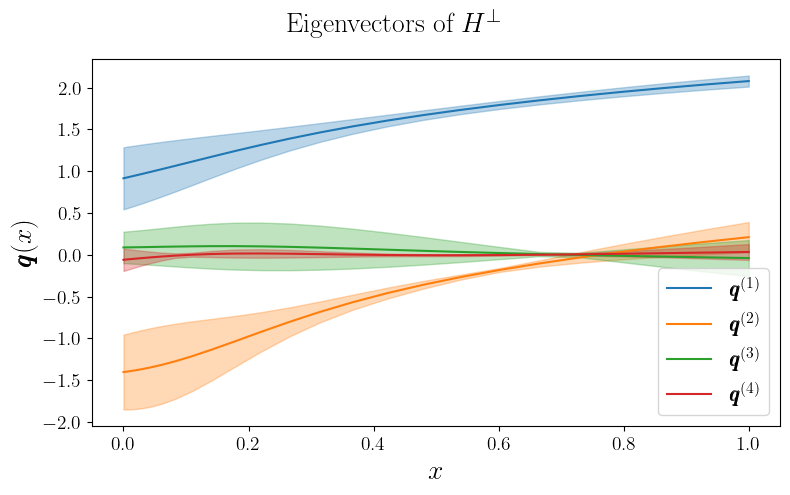

In [12]:
plot_Q_directions(
    context,
    ref_epoch=1000,
    ranks=[1, 2, 3, 4],
    colors=["C0", "C1", "C2", "C3"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

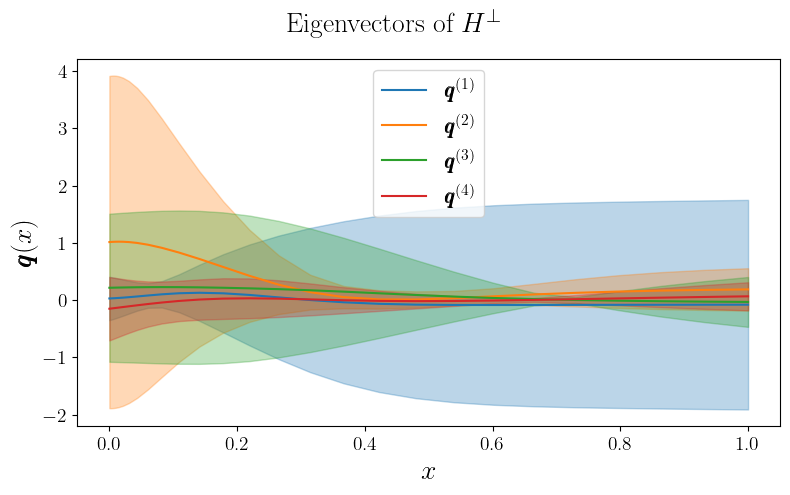

In [13]:
plot_Q_directions(
    context,
    ref_epoch=20000,
    ranks=[1, 2, 3, 4],
    colors=["C0", "C1", "C2", "C3"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

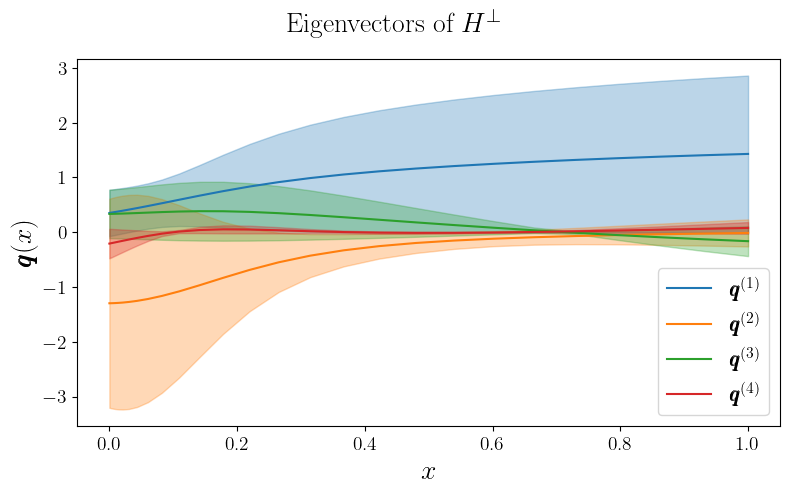

In [16]:
plot_Q_directions(
    context,
    ref_epoch=2000,
    ranks=[1, 2, 3, 4],
    colors=["C0", "C1", "C2", "C3"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

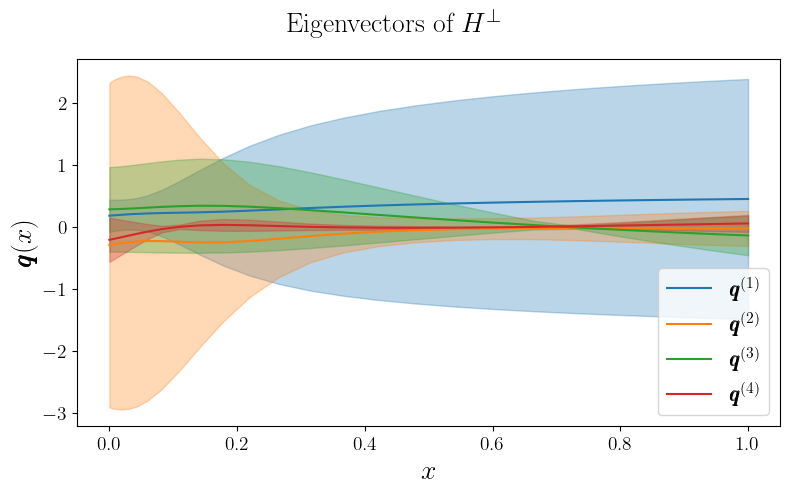

In [17]:
plot_Q_directions(
    context,
    ref_epoch=3000,
    ranks=[1, 2, 3, 4],
    colors=["C0", "C1", "C2", "C3"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

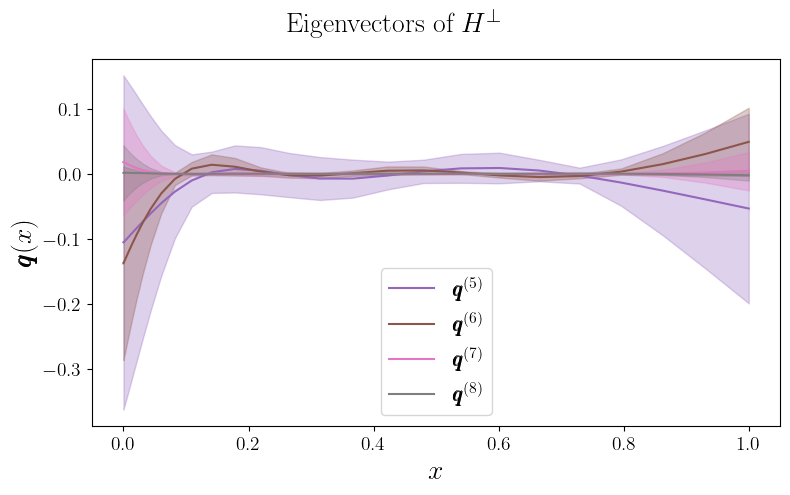

In [6]:
plot_Q_directions(
    context,
    ref_epoch=20000,
    ranks=[5, 6, 7, 8],
    colors=["C4", "C5", "C6", "C7"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

# Eigenvectors at $T_{\rm ref}= 0$

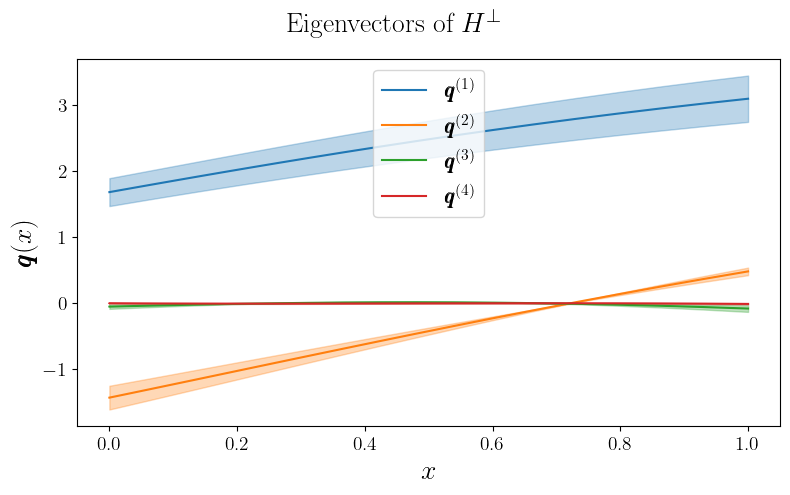

In [8]:
plot_Q_directions(
    context,
    ref_epoch=0,
    ranks=[1, 2, 3, 4],
    colors=["C0", "C1", "C2", "C3"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

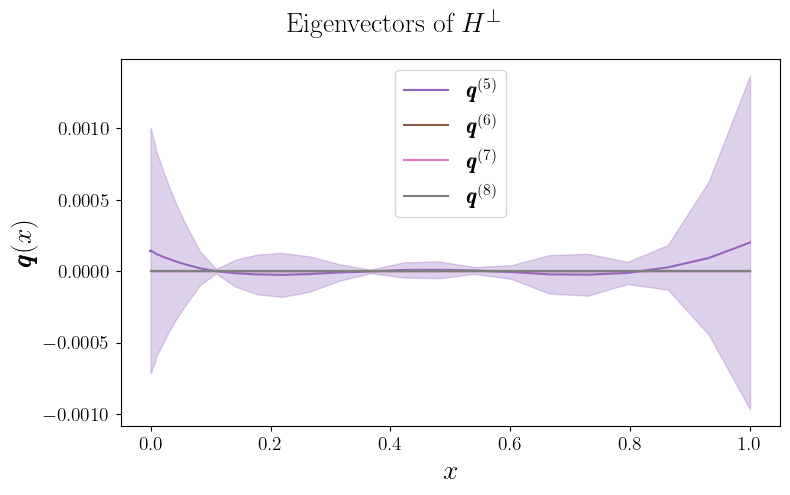

In [9]:
plot_Q_directions(
    context,
    ref_epoch=0,
    ranks=[5, 6, 7, 8],
    colors=["C4", "C5", "C6", "C7"],
    ax_specs={"set_ylabel": r"$\pmb{q}(x)$"},
    title=r"$\textrm{Eigenvectors of}~H^{\perp}$ "
)

# Fourier analysis

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from yadlt.distribution import Distribution

In [102]:
epochs = [300, 1000, 1500, 2000, 3000, 5000, 10000, 15000, 20000]
ncols = 3
nrows = 3
figsize = (5, 5)
common_epochs = context.get_config("replicas", "common_epochs")
freq = np.fft.fftfreq(context.Q_by_epoch[0].shape[-1])

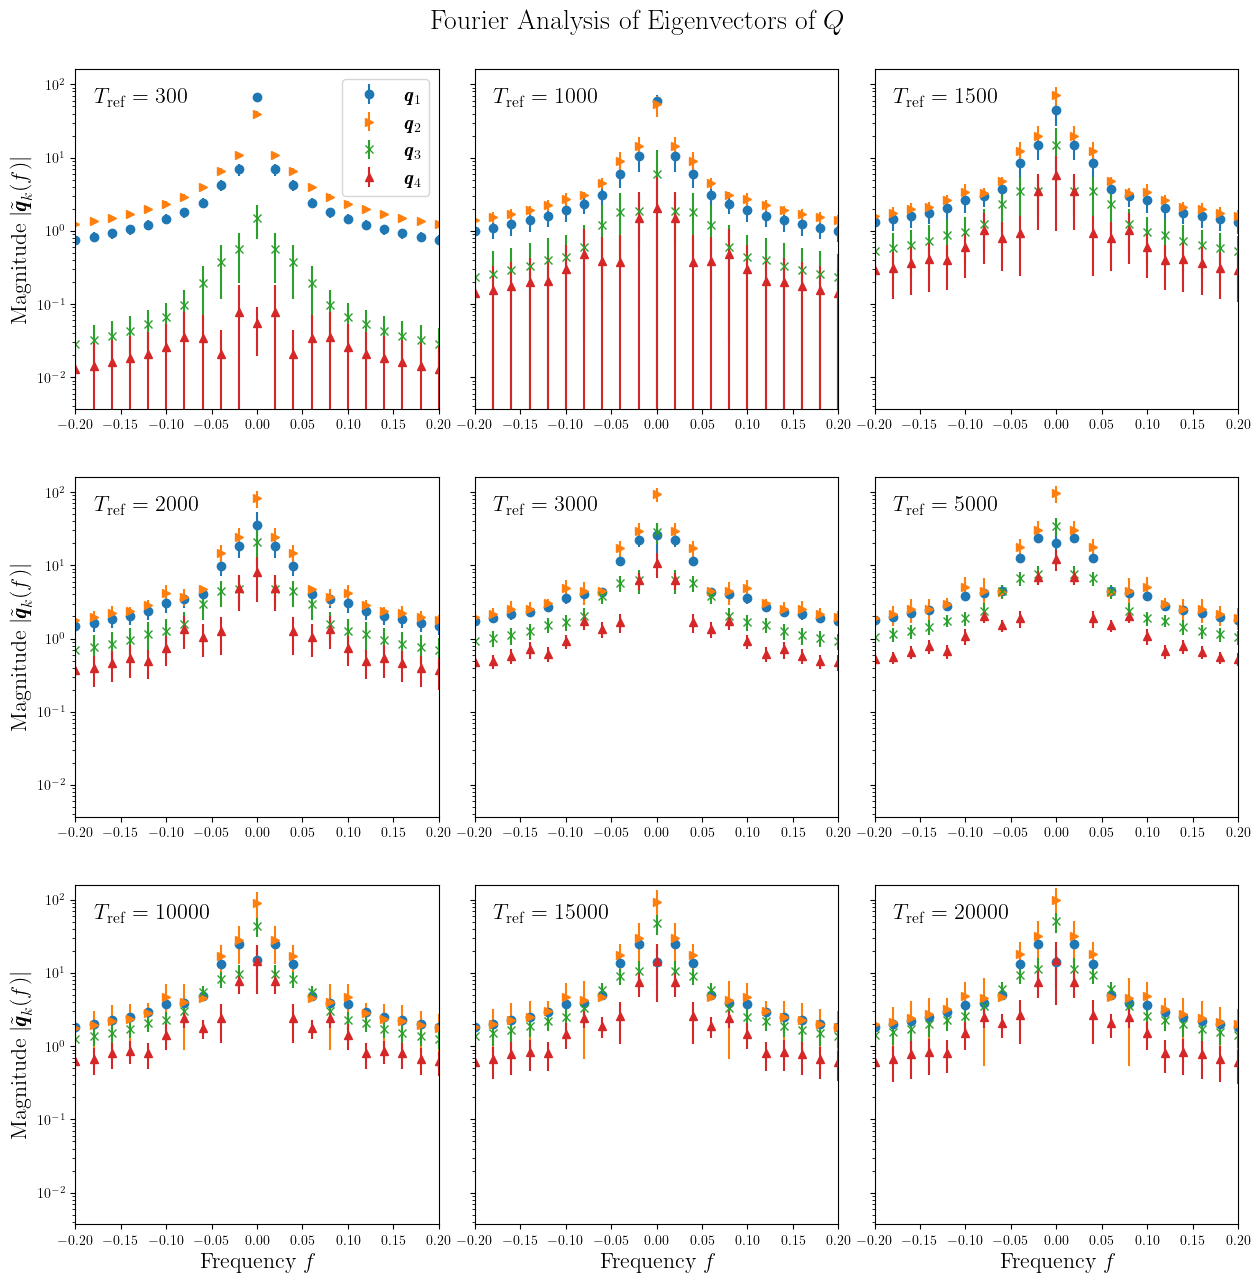

In [117]:
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * figsize[0], nrows * figsize[1]), sharey=True, gridspec_kw={'wspace': 0.1})

for j, (ax, epoch) in enumerate(zip(axes.flatten(), epochs)):
    epoch_idx = -1 if epoch == -1 else common_epochs.index(epoch)
    Q = context.Q_by_epoch[epoch_idx]

    list_dist = []
    for idx in [0, 1, 2, 3]:
      norm_dist = Distribution("Vector", size=Q.size, shape=(Q.shape[1],))

      for rep in range(Q.size):
        Q_rep = Q[rep]
        coeffs = np.fft.fft(Q_rep[:, idx])
        norms = np.abs(coeffs)
        norm_dist.add(norms)
      
      list_dist.append(norm_dist)
    
    ax.errorbar(freq, list_dist[0].get_mean(), yerr=list_dist[0].get_std(), fmt='o', color='C0', label=r'$\pmb{q}_1$')
    ax.errorbar(freq, list_dist[1].get_mean(), yerr=list_dist[1].get_std(), fmt='>', color='C1', label=r'$\pmb{q}_2$')
    ax.errorbar(freq, list_dist[2].get_mean(), yerr=list_dist[2].get_std(), fmt='x', color='C2', label=r'$\pmb{q}_3$')
    ax.errorbar(freq, list_dist[3].get_mean(), yerr=list_dist[3].get_std(), fmt='^', color='C3', label=r'$\pmb{q}_4$')
    ax.set_xlim(-0.2, 0.2)
    ax.text(0.05, 0.9, rf"$T_{{\rm ref}} = {epoch}$", transform=ax.transAxes, fontsize=16)
    ax.set_yscale('log')

    if j == 0:
      ax.legend(fontsize=14)

    if j % 3 == 0:
       ax.set_ylabel(r"$\textrm{Magnitude}~|\tilde{\pmb{q}}_k(f)|$", fontsize=16)

    if j // 3 == 2:
       ax.set_xlabel(r"$\textrm{Frequency}~f$", fontsize=16)


fig.suptitle(r"$\textrm{Fourier Analysis of Eigenvectors of}~Q$ ", fontsize=20, y=0.92)
fig.savefig("fourier_analysis_eigenvectors_Q.pdf", bbox_inches='tight')

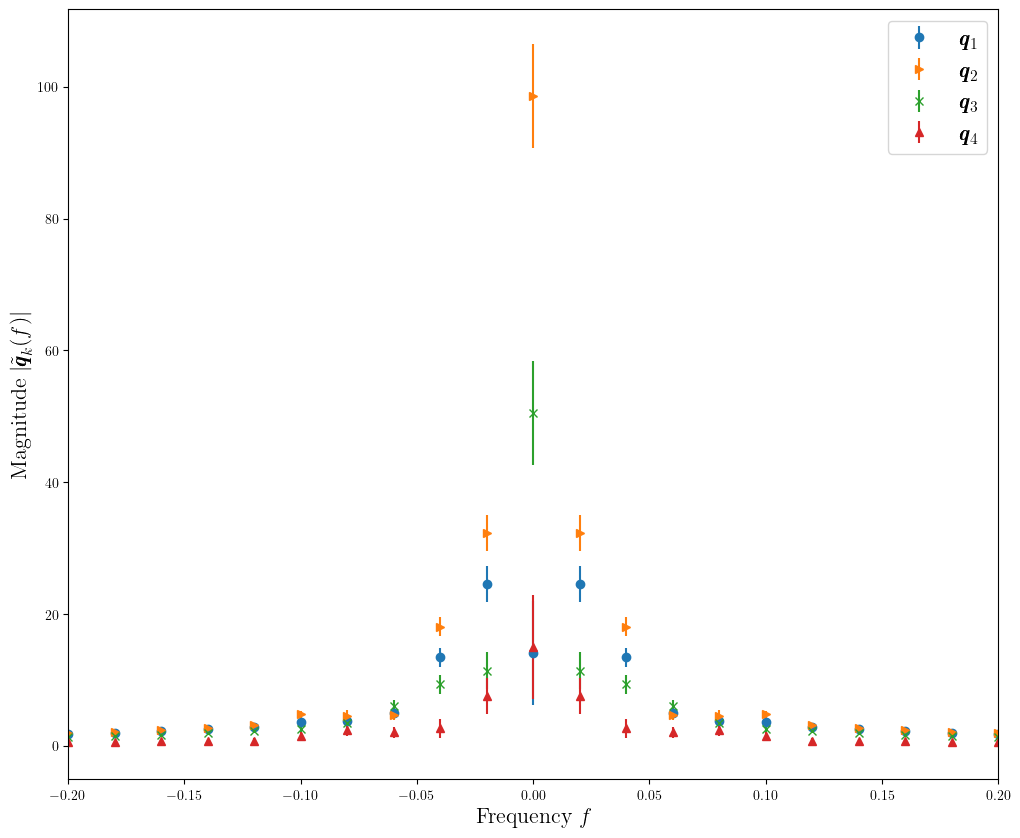

In [ ]:
freq = np.fft.fftfreq(Q.shape[-1])
fig, ax = plt.subplots(figsize=(12,10))
